# Data Cleaning

In [8]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# 1.1 Load Data

In [9]:
# load spam.csv into dataframe
spam = pd.read_csv("spam.csv", encoding="latin-1")
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
# drop empty columns and rename v1 and v2
spam["target"] = spam.v1
spam["text"] = spam.v2

for col in spam.columns:
    if (col != "target") & (col != "text"):
        spam.drop(col, axis=1, inplace=True)
        
spam.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 2.1 See if classes are balanced

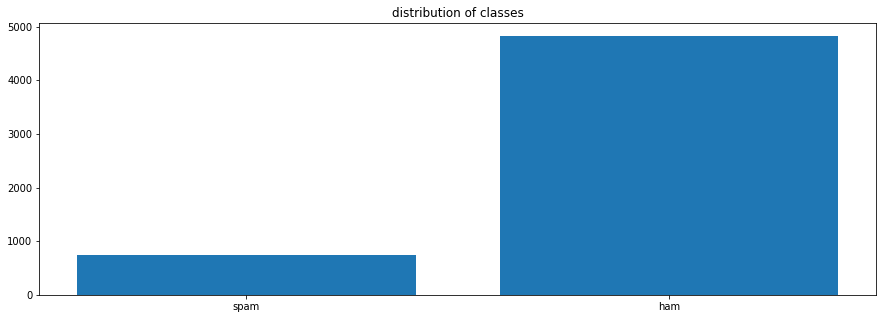

In [12]:
# get value counts
value_counts = dict(spam.target.value_counts())

# plot class distribution
plt.figure(figsize=(15, 5))
plt.bar(["spam", "ham"], [value_counts["spam"], value_counts["ham"]])
plt.title("distribution of classes")
plt.show()

Most of the data is ham. So I will use a stratified split

# 2.2 Train / Test Split

In [15]:
# stratified split
sss = StratifiedShuffleSplit(test_size = 0.2)
train_index, test_index = next(sss.split(spam.text, spam.target))

len(train_index), len(test_index)

(4457, 1115)

In [17]:
# use indices to split the data
train = spam.iloc[train_index]
test = spam.iloc[test_index]

In [18]:
# check value counts to ensure a quality split
print(train.target.value_counts(normalize=True))
print(test.target.value_counts(normalize=True))

ham     0.865829
spam    0.134171
Name: target, dtype: float64
ham     0.866368
spam    0.133632
Name: target, dtype: float64


# 3.1 Check for duplicate values

From this point on I am only inspecting the training set. However I will apply changes to both sets as needed. 

In [21]:
train.duplicated().sum()

277

In [22]:
# drop duplicates from both train and test sets

train = train.drop_duplicates()
test = test.drop_duplicates()